# WUM - Lab Assingment No. 1
## Krzysztof Hałubek

In [170]:
# Imports and installs
!pip install gdown

import pandas as pd
import numpy as np
import gdown
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score, accuracy_score, classification_report, mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression

## Task 1 - Data description


In [171]:
file_id = "1sMBD0MpG4B9mahw8JfbEyb6Q7lsnrlPJ"
gdown.download(f"https://drive.google.com/uc?id={file_id}", "earnings.csv")

df = pd.read_csv("earnings.csv", sep=';', quotechar='"')

print("\nDataset shape:", df.shape)
df.head()

print("Dataset info:")
df.info()

print("Missing values per column:\n", df.isnull().sum())

qualitative = ['sector', 'section_07', 'sex', 'education', 'contract']
quantitative = [col for col in df.columns if col not in qualitative and col != 'id']

print("Qualitative variables:", qualitative)
print("Quantitative variables:", quantitative)

df[quantitative].describe()

Downloading...
From: https://drive.google.com/uc?id=1sMBD0MpG4B9mahw8JfbEyb6Q7lsnrlPJ
To: /content/earnings.csv
100%|██████████| 668k/668k [00:00<00:00, 8.94MB/s]



Dataset shape: (11000, 15)
Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 11000 non-null  int64  
 1   base               11000 non-null  float64
 2   bonus              11000 non-null  float64
 3   overtime_pay       11000 non-null  float64
 4   other              11000 non-null  float64
 5   sector             11000 non-null  int64  
 6   section_07         11000 non-null  int64  
 7   sex                11000 non-null  int64  
 8   education          11000 non-null  int64  
 9   contract           11000 non-null  int64  
 10  age                11000 non-null  int64  
 11  duration_total     11000 non-null  float64
 12  duration_entity    11000 non-null  float64
 13  duration_nominal   11000 non-null  float64
 14  duration_overtime  11000 non-null  float64
dtypes: float64(8), int64(7)
memo

,base,bonus,overtime_pay,other,age,duration_total,duration_entity,duration_nominal,duration_overtime
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.00000,11000.000000,11000.000000,11000.000000
mean,33376.738065,2128.486176,1679.273923,2477.625815,42.470182,18.56708,11.401382,1301.307435,47.702325
std,19276.551638,4966.444726,5407.964344,3715.419120,10.012140,10.99695,9.322181,540.189234,111.963867
min,10.000000,0.000000,0.000000,0.000000,19.000000,0.01000,0.010000,12.800000,0.000000
25%,20995.115000,0.000000,0.000000,0.000000,34.000000,9.03000,3.070000,766.800000,0.000000
50%,31341.245000,620.000000,0.000000,2141.820000,43.000000,19.03500,9.100000,1591.900000,0.000000
75%,41348.290000,2940.717500,1139.330000,3497.430000,51.000000,27.11000,18.040000,1768.000000,40.000000
max,241624.390000,258061.000000,228110.340000,88555.760000,77.000000,57.02000,46.010000,2024.000000,1812.580000


There are 11000 observations provided in the given dataset. No values are missing. There are 5 qualitative variables: sector, section 07, sex, education and contract. The other variables: base, bonus, overtime pay, other, age, duration total, duration entity, duration nominal and duration overtime are all quantitatvie.


Frequency table for sector:
sector
1    0.959
2    0.041
Name: proportion, dtype: float64

Frequency table for section_07:
section_07
2    0.533
3    0.248
1    0.218
Name: proportion, dtype: float64

Frequency table for sex:
sex
2    0.754
1    0.246
Name: proportion, dtype: float64

Frequency table for education:
education
2    0.603
4    0.180
5    0.082
3    0.062
1    0.039
6    0.033
Name: proportion, dtype: float64

Frequency table for contract:
contract
1    0.846
2    0.154
Name: proportion, dtype: float64


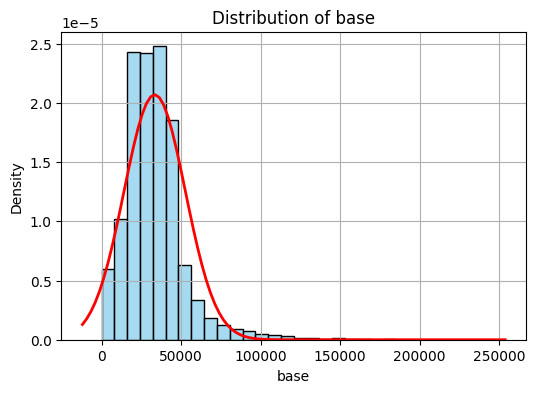

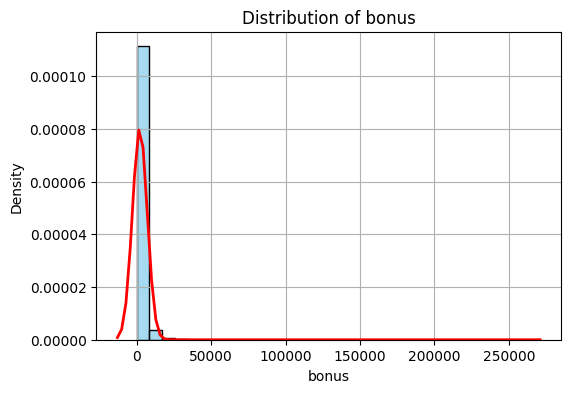

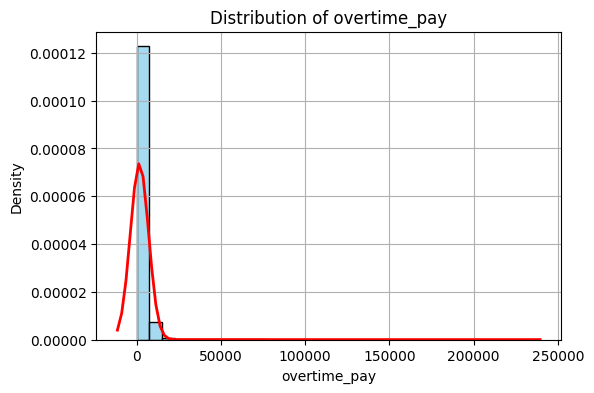

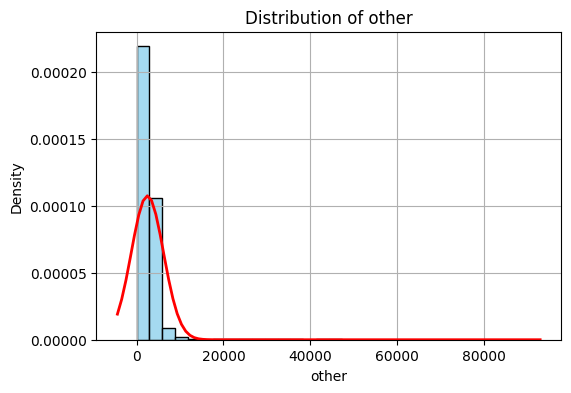

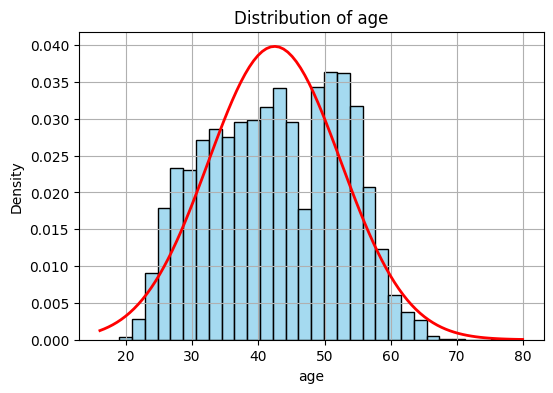

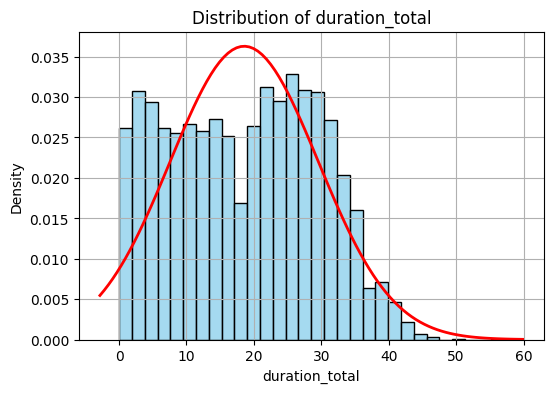

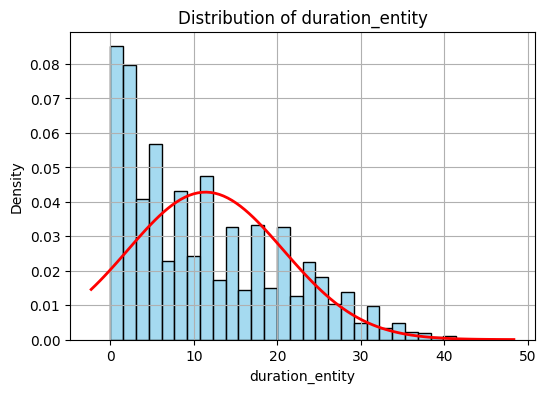

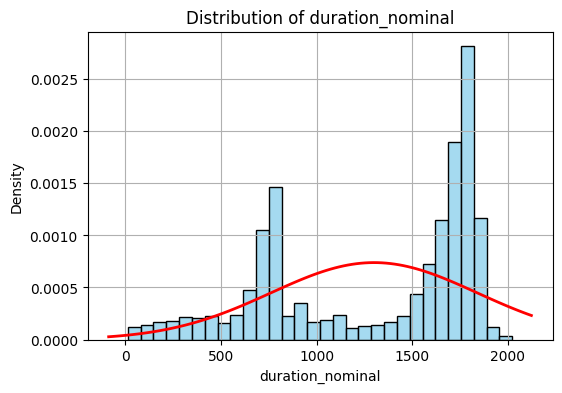

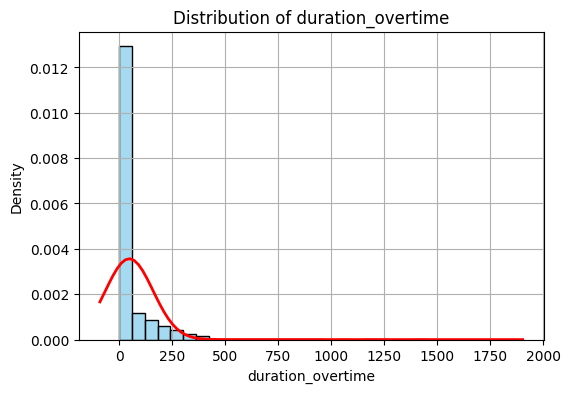

In [172]:
for col in qualitative:
    print(f"\nFrequency table for {col}:")
    print(df[col].value_counts(normalize=True).round(3))

for col in quantitative:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=False, bins=30, stat='density', color='skyblue')

    mu, sigma = df[col].mean(), df[col].std()
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, sigma)
    plt.plot(x, p, 'r', linewidth=2)

    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()

### Frequency Tables And Variables' Distributions
Frequency tables show that almost all observations describe workers employed in the public sector. More than half of the observed individuals work in *Education*, while the rest distribute roughly equally between *Public Administration and Defence; Compulsory Social Security* and *Human Health and Social Work Activities*. Around three quarters of the observees are male and majority of employees in the sample have obtained higher education, with a much smaller share having only basic or very low education levels. The dataset represents mostly emplyees under indefinite period employment contract.

The base salary is heavily right-skewed with most values concentrated between **20,000** and **60,000**, with a few extreme outliers stretching up to **~250,000**. The bonus and overtime pay variables are even more right-skewed than base salary, with most of them clustered very close to zero and very few values causing the scale to stretch very far right (again, up to **~250,000**). Distribution of other suffers the same fate, but with all values below **90,000**. The age distribution is roughly symmetric and resembles a normal distribution, with most values falling between **30** and **60** years. Duration total's distribution appears bimodal, with visible peaks around **5** and **25** years. Distribution of duration entity is right-skewed, with most values concentrated below **10** years. There's a long tail toward higher durations, but relatively few employees have been in the same entity that long. Duration nominal's distribution is clearly bimodal - two clear peaks around **800** and **1800**, possibly indicating two contract types. Duration overtime is highly right-skewed with most values clustered between **0** and **250**, but with some outliers stretching up to almost **2000**.

### Exploring Correlations

Let's examine two heatmaps to help determine which quantitative variables to drop or transform. The first heatmap shows the correlation of raw quantitative features, while the second focuses on features log-transformed and scaled using `sklearn.preprocessing.StandardScaler`.

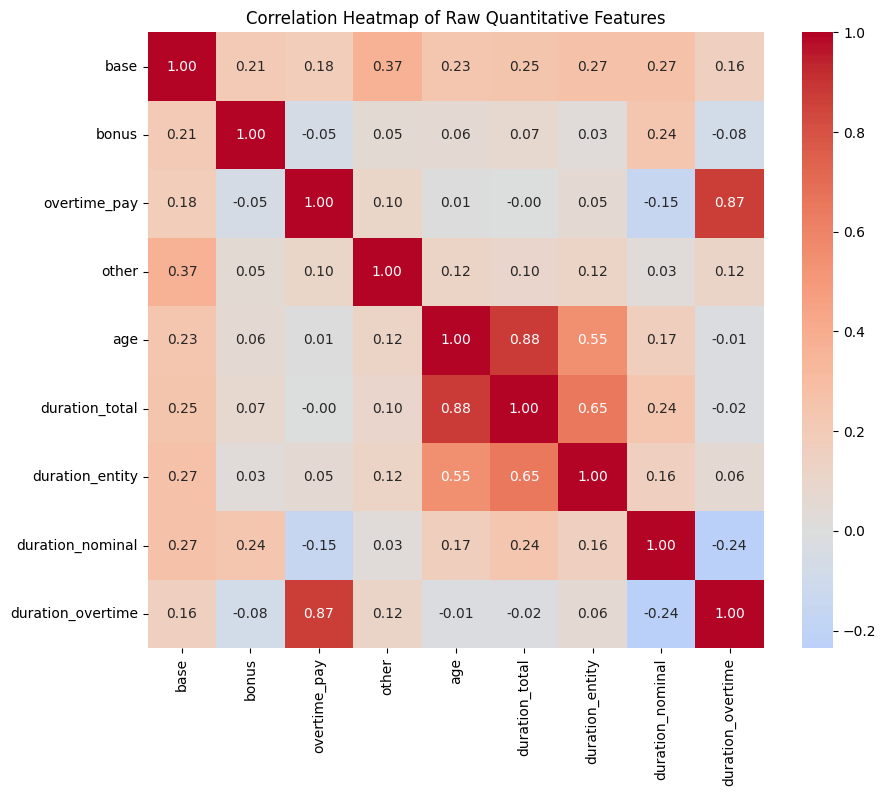

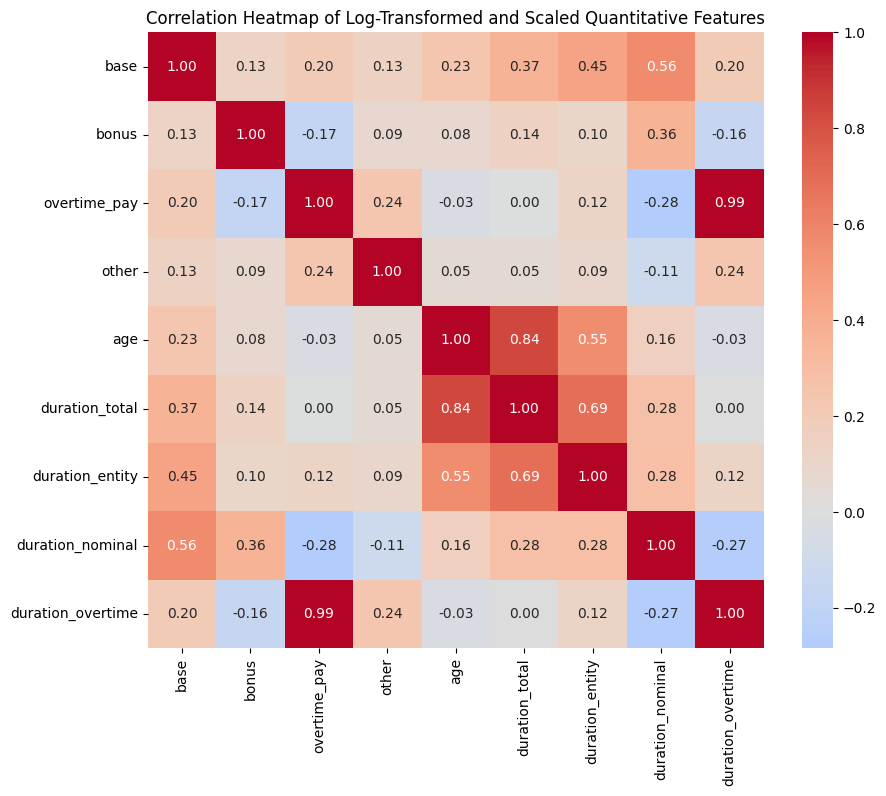

In [173]:
corr = df[quantitative].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0, square=True)
plt.title("Correlation Heatmap of Raw Quantitative Features")
plt.show()

to_scale = ['base', 'bonus', 'overtime_pay', 'other', 'duration_overtime']

df_scaled = df.copy()
for col in quantitative:
    df_scaled[col] = np.log1p(df[col])

df_scaled = pd.DataFrame(
    StandardScaler().fit_transform(df_scaled[quantitative]),
    columns=quantitative
)

corr = df_scaled[quantitative].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0, square=True)
plt.title("Correlation Heatmap of Log-Transformed and Scaled Quantitative Features")
plt.show()

The strongest correlation arises between *duration overtime* and *overtime pay*, with **0.87** correlation coefficient on raw data, skyrocketing up to **0.99** on the log-transformed heatmap. We can also see a very strong correlation between *age* and *duration total* (**0.88** raw and **0.84** log-transformed). Other strong correlations worth noting in the context of our analysis:

*   *duration entity* and *duration total* (**0.65** raw, **0.69** log-transformed)
*   *age* and *duration entity* (**0.55** on both heatmaps)
*   *base* and *duration nominal* (**0.56** log-transformed)

This quick analysis leads us to a conclusion that we should drop either *duration overtime* or *overtime pay* and *age* or *duration total*. Those two pairs make total sense to be strongly correlated and for the purpose of all future tasks we will drop *overtime pay*, since pay might be already reflected in other variables. We will also drop *age* over *duration total*, since total duration of employment is rather more informative than age.

## Task 2 - Clustering


After extensive testing and consideration, the conclusion was reached that the best clustering will be ahieved without creating dummy variables for qualitative data and using a simple K-Means algorithm after log-transforming selected few extremely skewed quantitative variables. Other means of clustering proved ineffective, with low silhuette score (approx. **0.2**) or suspisously high silhuette score (above **0.9**) which suggests that few variables (most likely qualitative) dominate the clustering process completely. The middle ground was reached with aforementioned methods, which give a silhouette score around **0.56**, being a fine compromise between meaningful data representation and cluster separation, avoiding both overfitting to categorical splits and underfitting due to untransformed skewed data

In [174]:
hierarchical_df = df.drop(columns=['age', 'overtime_pay', 'id'], errors='ignore')
to_log = ['bonus', 'other', 'duration_overtime']

hierarchical_df[to_log] = np.log1p(hierarchical_df[to_log])

best_silhuette = -1
best_k = -1

for k in range(3, 11):
    model = KMeans(n_clusters=k)
    labels = model.fit_predict(hierarchical_df)
    score = silhouette_score(hierarchical_df, labels)

    print(f'K={k}: Silhouette Score = {score:.6f}')

    if score > best_silhuette:
        best_silhuette = score
        best_k = k

print(f'\nBest K: {best_k} with Silhouette Score: {best_silhuette:.6f}')

K=3: Silhouette Score = 0.566322
K=4: Silhouette Score = 0.548454
K=5: Silhouette Score = 0.524233
K=6: Silhouette Score = 0.515810
K=7: Silhouette Score = 0.539508
K=8: Silhouette Score = 0.537226
K=9: Silhouette Score = 0.531927
K=10: Silhouette Score = 0.531308

Best K: 3 with Silhouette Score: 0.566322


The optimal number of clusters based on the average silhuette score arises to be 3.

## Task 3 - Classification

Let's start by splitting the data into target and feature tables, encoding qualitative variables again performing a train-test split.

In [175]:
y = (df['education'] <= 2).astype(int)
X = df[[col for col in df.columns if col != 'education']]

quantitative =  ['sector', 'section_07', 'sex', 'contract']
X = pd.get_dummies(X, columns=quantitative, drop_first=True)
X.drop(columns=['age', 'overtime_pay', 'id'], inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

Now we will train and test the performance on a model utilizing Random Forest Classifier, as it gives easy and direct access to feature importance.

We will calculate the accuraccy score and print a classification report to provide an assessment of the expected performance on the data not seen in training.

Then, using cross-validation we will assess the quality of our model and evaluate the relative importance of different variables in the model.

Accuracy on Test Set: 0.880909

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       785
           1       0.91      0.90      0.91      1415

    accuracy                           0.88      2200
   macro avg       0.87      0.87      0.87      2200
weighted avg       0.88      0.88      0.88      2200


Cross-validation accuracy scores:
Fold 1 : 0.875909
Fold 2 : 0.871364
Fold 3 : 0.877273
Fold 4 : 0.881818
Fold 5 : 0.880909

Mean CV accuracy: 0.877455
Std CV accuracy: 0.003755

Feature Importance:
              feature  importance
5    duration_nominal    0.207768
0                base    0.189667
3      duration_total    0.163276
2               other    0.151868
4     duration_entity    0.081232
1               bonus    0.069438
6   duration_overtime    0.053790
9        section_07_3    0.033555
8        section_07_2    0.025402
10              sex_2    0.009803
11         contract_2    0.00885

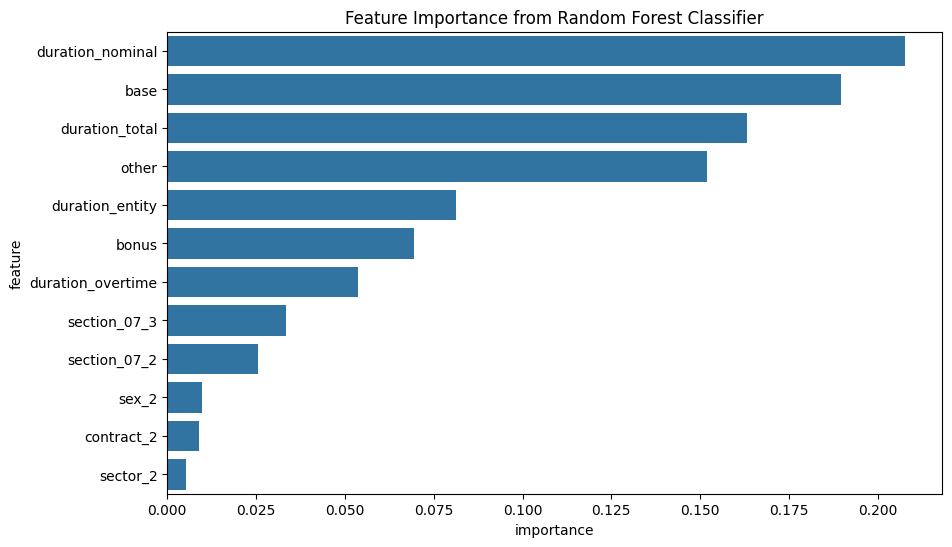

In [176]:
clf = RandomForestClassifier(n_estimators=100, random_state=69)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(f'Accuracy on Test Set: {accuracy_score(y_test, y_pred):.6f}')

print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred))

cv_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')

print('\nCross-validation accuracy scores:')
for i, score in enumerate(cv_scores, 1):
  print(f'Fold {i} : {score:.6f}')

print(f'\nMean CV accuracy: {cv_scores.mean():.6f}')
print(f'Std CV accuracy: {cv_scores.std():.6f}')

feature_importances = clf.feature_importances_

feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
}).sort_values(by='importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest Classifier')
plt.show()

### Classification Model Summary

Observed model performance on the test set was strong, achievieng an accuracy of **0.8809**. The classification report shows:


*   Precision: **0.91** (for lower education), **0.82** (for higher education)
*   Recall: **0.90** and **0.85** respectively
*   Macro F1-score: **0.87**

To assess generalization, we performed **5-fold cross-validation**, which produced stable results:


*   Mean Accuracy: **0.8775**
*   Standard Deviation: **0.0038**

The most important features identified by the model are: **duration_nominal** and **base**, followed by **duration_total** and **other**.

These results suggest that income-related variables and work duration metrics are the strongest predictors of education level, while categorical attributes like sex, sector or contract type have minimal influence.

## Task 4 - Regression

Similair to classification, we start by splitting the data into target and feature tables, encoding qualitative variables and performing a traint-test split.

In [177]:
y = df['base']
X = df[[col for col in df.columns if col != 'base']]

quantitative =  ['sector', 'section_07', 'sex', 'contract', 'education']
X = pd.get_dummies(X, columns=quantitative, drop_first=True)
X.drop(columns=['age', 'overtime_pay', 'id'], inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)

We will test the Linear Regression model on two sets of data:


*   Log-transformed for highly skewed variables
*   Default

But in both scenarios we will scale all predictors (except for categorical dummies), in order to better compare feature impact.
Then we will decide if some variables are unnecessary and deduce the final model.

Regression on default scaled values:

Test R² Score: 0.514866
Test RMSE: 187039846.368565
Test MAE: 8961.313928

Cross-validation R² scores:
Fold 1 : 0.471612
Fold 2 : 0.487187
Fold 3 : 0.489119
Fold 4 : 0.500064
Fold 5 : 0.517215

Mean CV R²: 0.493040
Std CV R²: 0.015117

Feature coefficients (signed feature importance):
               feature   coefficient
4    duration_nominal   5719.770419
2      duration_total   4197.654837
1               other   3530.740566
5   duration_overtime   2517.863068
0               bonus   1735.457672
3     duration_entity   1615.563697
6            sector_2    582.281492
8        section_07_3  -1080.709908
9               sex_2  -1983.690414
11        education_2  -5175.226462
10         contract_2  -5214.702098
7        section_07_2  -7018.549512
12        education_3 -18216.496568
13        education_4 -21659.665886
14        education_5 -29069.908256
15        education_6 -29456.453059


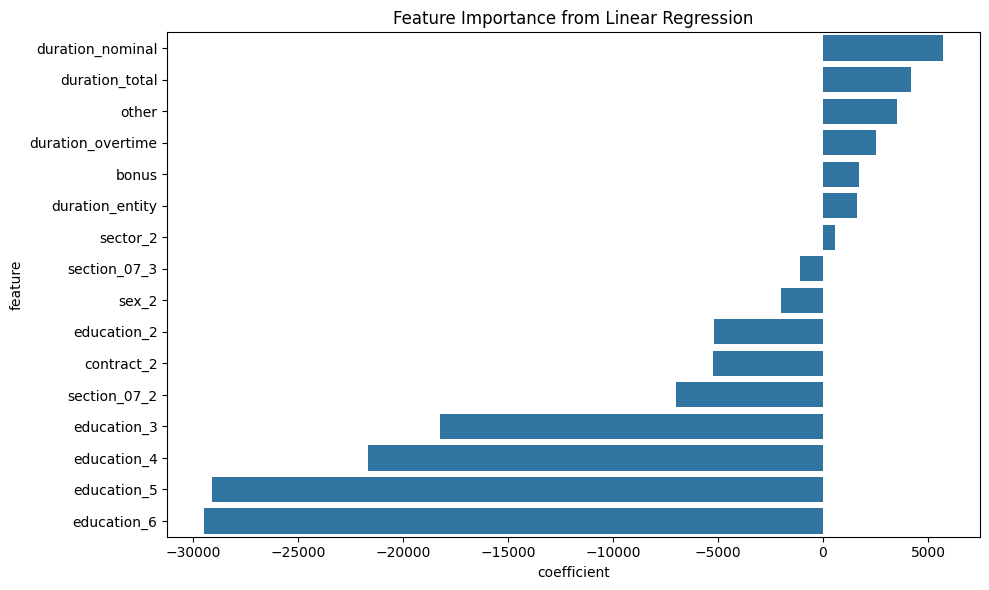


Regression on log-transformed scaled values:

Test R² Score: 0.466218
Test RMSE: 205795578.386187
Test MAE: 9294.427414

Cross-validation R² scores:
Fold 1 : 0.462924
Fold 2 : 0.459943
Fold 3 : 0.454417
Fold 4 : 0.470237
Fold 5 : 0.480724

Mean CV R²: 0.465649
Std CV R²: 0.009104

Feature coefficients (signed feature importance):
               feature   coefficient
4    duration_nominal   7222.773106
2      duration_total   4636.516907
5   duration_overtime   3173.605693
1               other   1646.593668
3     duration_entity   1609.251731
6            sector_2   1393.944530
0               bonus   -856.435020
8        section_07_3  -2036.813291
9               sex_2  -2568.718331
10         contract_2  -4840.118485
7        section_07_2  -8896.400343
11        education_2 -10148.467029
12        education_3 -23872.779253
13        education_4 -27425.676018
14        education_5 -35419.965581
15        education_6 -35681.019294


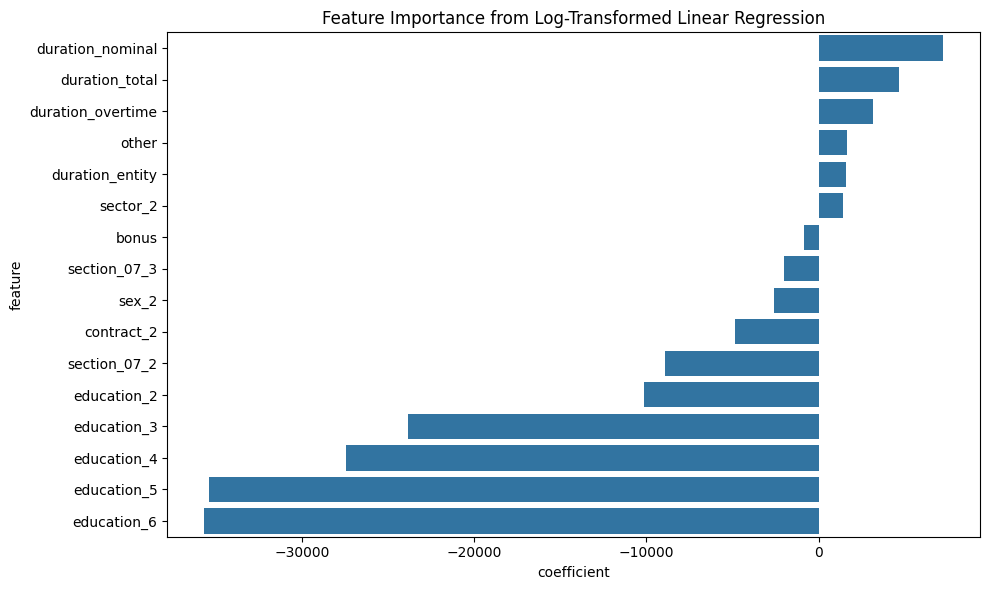

In [178]:
to_scale = ['bonus', 'other', 'duration_total', 'duration_entity', 'duration_nominal', 'duration_overtime']
to_log1p = ['bonus', 'other', 'duration_overtime']

print('Regression on default scaled values:\n')

scaler_default = StandardScaler()

X_train_scaled = X_train.copy()
X_train_scaled[to_scale] = scaler_default.fit_transform(X_train_scaled[to_scale])

X_test_scaled = X_test.copy()
X_test_scaled[to_scale] = scaler_default.transform(X_test_scaled[to_scale])

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print(f'Test R² Score: {r2_score(y_test, y_pred):.6f}')
print(f'Test RMSE: {mean_squared_error(y_test, y_pred):.6f}')
print(f'Test MAE: {mean_absolute_error(y_test, y_pred):.6f}')

X_scaled = X.copy()
X_scaled[to_scale] = scaler_default.transform(X_scaled[to_scale])

cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='r2')
print('\nCross-validation R² scores:')
for i, score in enumerate(cv_scores, 1):
  print(f'Fold {i} : {score:.6f}')
print(f'\nMean CV R²: {cv_scores.mean():.6f}')
print(f'Std CV R²: {cv_scores.std():.6f}')

coef_df = pd.DataFrame({
    "feature": X.columns,
    "coefficient": model.coef_
}).sort_values(by="coefficient", ascending=False)

print('\nFeature coefficients (signed feature importance):\n', coef_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='coefficient', y='feature', data=coef_df)
plt.title('Feature Importance from Linear Regression')
plt.tight_layout()
plt.show()

print('\nRegression on log-transformed scaled values:\n')

X_train_log = X_train.copy()
X_train_log[to_log1p] = np.log1p(X_train_log[to_log1p])

X_test_log = X_test.copy()
X_test_log[to_log1p] = np.log1p(X_test_log[to_log1p])

scaler_log = StandardScaler()

X_train_log[to_scale] = scaler_log.fit_transform(X_train_log[to_scale])
X_test_log[to_scale] = scaler_log.transform(X_test_log[to_scale])

model_log = LinearRegression()
model_log.fit(X_train_log, y_train)

y_pred_log = model_log.predict(X_test_log)

print(f'Test R² Score: {r2_score(y_test, y_pred_log):.6f}')
print(f'Test RMSE: {mean_squared_error(y_test, y_pred_log):.6f}')
print(f'Test MAE: {mean_absolute_error(y_test, y_pred_log):.6f}')

X_log = X.copy()
X_log[to_log1p] = np.log1p(X_log[to_log1p])
X_log[to_scale] = scaler_log.transform(X_log[to_scale])

cv_scores_log = cross_val_score(model_log, X_log, y, cv=5, scoring='r2')
print('\nCross-validation R² scores:')
for i, score in enumerate(cv_scores_log, 1):
  print(f'Fold {i} : {score:.6f}')
print(f'\nMean CV R²: {cv_scores_log.mean():.6f}')
print(f'Std CV R²: {cv_scores_log.std():.6f}')

coef_df_log = pd.DataFrame({
    "feature": X.columns,
    "coefficient": model_log.coef_
}).sort_values(by="coefficient", ascending=False)

print('\nFeature coefficients (signed feature importance):\n', coef_df_log)

plt.figure(figsize=(10, 6))
sns.barplot(x='coefficient', y='feature', data=coef_df_log)
plt.title('Feature Importance from Log-Transformed Linear Regression')
plt.tight_layout()
plt.show()

We are not discouraged by the negative coefficients for education, remembering that in our data the higher the number, the lower the actual education level and due to `drop_first=True` in `pd.get_dummies` our baseline is the doctorate level. The model working on data without log-transforming it first seems to perform better, so we will use it as our final model. The variable *sector_2* (private sector) has the least impact, so lets try to drop it.

Test R² Score: 0.515022
Test RMSE: 186979470.415049
Test MAE: 8957.813708

Cross-validation R² scores:
Fold 1 : 0.471668
Fold 2 : 0.487205
Fold 3 : 0.489472
Fold 4 : 0.500098
Fold 5 : 0.517226

Mean CV R²: 0.493134
Std CV R²: 0.015088

Feature coefficients (signed feature importance):
               feature   coefficient
4    duration_nominal   5736.195758
2      duration_total   4202.351475
1               other   3525.063637
5   duration_overtime   2510.491033
0               bonus   1735.203311
3     duration_entity   1599.310806
7        section_07_3  -1018.863162
8               sex_2  -1979.575950
9          contract_2  -5196.263107
10        education_2  -5215.859967
6        section_07_2  -6981.617228
11        education_3 -18270.126242
12        education_4 -21706.025758
13        education_5 -29137.388901
14        education_6 -29522.368832


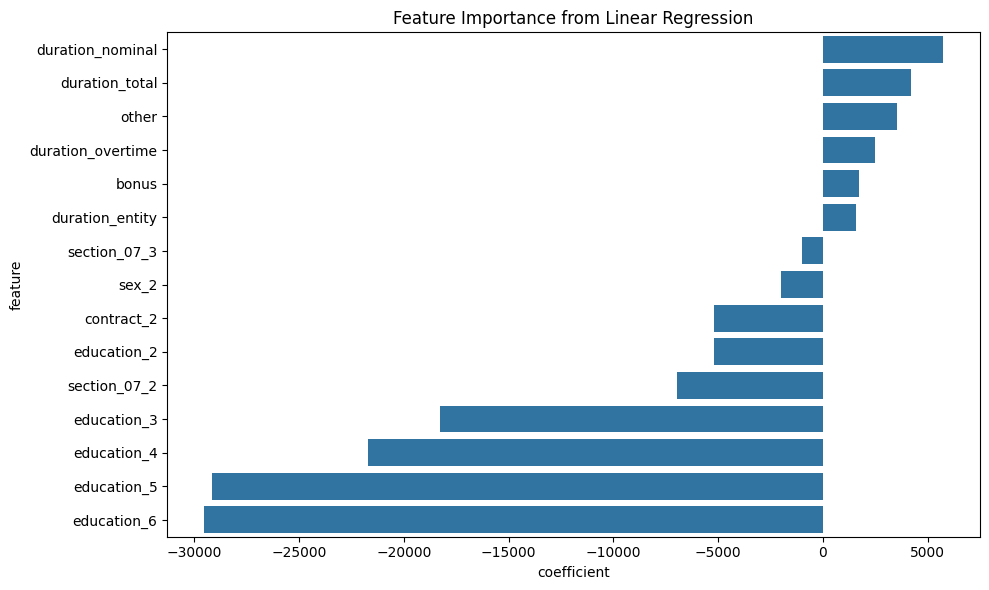

In [179]:
y = df['base']
X = df[[col for col in df.columns if col != 'base']]

quantitative =  ['sector', 'section_07', 'sex', 'contract', 'education']
X = pd.get_dummies(X, columns=quantitative, drop_first=True)
X.drop(columns=['age', 'overtime_pay', 'id', 'sector_2'], inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)

to_scale = ['bonus', 'other', 'duration_total', 'duration_entity', 'duration_nominal', 'duration_overtime']

scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_train_scaled[to_scale] = scaler.fit_transform(X_train_scaled[to_scale])

X_test_scaled = X_test.copy()
X_test_scaled[to_scale] = scaler.transform(X_test_scaled[to_scale])

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print(f'Test R² Score: {r2_score(y_test, y_pred):.6f}')
print(f'Test RMSE: {mean_squared_error(y_test, y_pred):.6f}')
print(f'Test MAE: {mean_absolute_error(y_test, y_pred):.6f}')

X_scaled = X.copy()
X_scaled[to_scale] = scaler.transform(X_scaled[to_scale])

cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='r2')
print('\nCross-validation R² scores:')
for i, score in enumerate(cv_scores, 1):
  print(f'Fold {i} : {score:.6f}')
print(f'\nMean CV R²: {cv_scores.mean():.6f}')
print(f'Std CV R²: {cv_scores.std():.6f}')

coef_df = pd.DataFrame({
    "feature": X.columns,
    "coefficient": model.coef_
}).sort_values(by="coefficient", ascending=False)

print('\nFeature coefficients (signed feature importance):\n', coef_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='coefficient', y='feature', data=coef_df)
plt.title('Feature Importance from Linear Regression')
plt.tight_layout()
plt.show()

We have produced a model which predicts the base salary based on other variables except *age*, *overtime_pay* and *sector*. Our model achieves the Mean Absolute Error of **8958**, the R² Score of **0.5150**.

Cross validation shows the model to be generalizable and stable, at:

*   Mean Accuracy: **0.4931**
*   Standard Deviation: **0.0151**

Unsuprisingly, the most important predictor is *education*, with doctorate employees earning the most and a visible decrease in salary with each unaquired education level, except *basic vocational* and *middle school and below* which earn almost the same. Employees also unsuprisingly earn more, the more they work and the more experience they have (*duration_nominal* and *duration_total*). A general increase in base salary is also noticable with increase in *other* remunerations, *duration_overtime* hours worked and *bonus*es received. A sizeable increase is also expected as *duration_entity* rises (time employed in current entity). It is also noticable, that employees working in *Human Health and Social Work Activities* and especially in *Education* earn less than their counterparts in *Public Administration and Defence; Compulsory Social Security*. Workers employed on a definite period contract earn less than workers employed on an indefinite period contract and women earn slightly less than men.

Overall the role of all variables included in the model is quite expected, which **can** lead to a conclusion, that the model behaves properly.